In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
df= pd.read_csv("C:/Users/Laval/Downloads/MSCatUOM/data-science/project/data/Natera-firstWeek.csv")

In [3]:
df.head()

,Ticket Number,Date of Service,Carrier Code,Charges,Payments,Insurance Payment,Patient Payment,Writeoffs,FinancialClass,CPT,...,Payment Post Date,NPI,Ordering Clinic,Denied Code,First Billed Date,Provider Profile,Insurance Bal,Patient Bal,Allowed Amount,Case Count
0,104452,1/2/2019,CFHP-E2,"$3,900.00",$0.00,$0.00,$0.00,$0.00,NC - NON-CONTRACTED,81507,...,1/22/2019,1316428238,ALAMO WOMEN'S OBGYN,197,1/8/2019,NTINC,$0.00,"$3,900.00",$0.00,1
1,104453,1/2/2019,CFHP-E2,"$3,900.00",$0.00,$0.00,$0.00,$0.00,NC - NON-CONTRACTED,81507,...,1/24/2019,1316428238,ALAMO WOMEN'S OBGYN,197,1/8/2019,NTINC,$0.00,"$3,900.00",$0.00,1
2,104454,1/2/2019,NCS,$795.00,$249.00,$0.00,$249.00,$546.00,SP - SELF PAY,99999,...,2/10/2019,1699760116,COMPREHENSIVE WOMEN'S HEALTHCARE,-,-,NTINC,$0.00,$0.00,$0.00,1
3,104496,1/2/2019,AETLIF-E,"$3,900.00",$0.00,$0.00,$0.00,$0.00,CT - CONTRACTED,81420,...,1/28/2019,1609216597,PEACHTREE WOMEN'S CLINIC - NORTHSIDE,-,1/8/2019,NTINC,"$3,900.00",$0.00,$749.00,1
4,104497,1/2/2019,AETLIF-E,"$3,900.00",$0.00,$0.00,$0.00,$0.00,CT - CONTRACTED,81420,...,1/30/2019,1609216597,PEACHTREE WOMEN'S CLINIC - NORTHSIDE,-,1/8/2019,NTINC,"$3,900.00",$0.00,$749.00,1


Try without pre processing

In [4]:
df.describe()

,Ticket Number,NPI,Case Count
count,22696.000000,2.269600e+04,22696.0
mean,214127.624559,1.508018e+09,1.0
std,53456.421470,2.815798e+08,0.0
min,104452.000000,1.003000e+09,1.0
25%,176543.750000,1.265811e+09,1.0
50%,201776.500000,1.508883e+09,1.0
75%,265322.250000,1.740272e+09,1.0
max,407677.000000,1.992998e+09,1.0


In [5]:
cols = ['Payments', 'Charges', 'Insurance Payment', 'Patient Payment', 'Writeoffs', 'Insurance Bal', 'Patient Bal', 'Allowed Amount']
for col in cols:
  df[col] = pd.to_numeric(df[col].apply(lambda x: x.replace('$','')).apply(lambda x: x.replace(' ','')).apply(lambda x: x.replace(',','')).apply(lambda x: x.replace('(','')).apply(lambda x: x.replace(')','')))

In [6]:
cols = ['Date of Service', 'Date of Entry', 'Payment Post Date', 'First Billed Date']
for col in cols:
  df[col] = pd.to_datetime(df[col], errors='coerce')

In [7]:
cols = ['Ticket Number', 'Carrier Code', 'FinancialClass', 'CPT', 'NPI', 'Ordering Clinic', 'Denied Code', 'Provider Profile']
for col in cols:
  df[col] = df[col].astype('str')

In [8]:
def checkStatus(row):
  if(row['Denied Code'].strip() == '-'  and row['Payment Post Date'].date() > row['Date of Service'].date()):
    return True
  elif(row['Denied Code'].strip() != '-' and row['Payment Post Date'].date() > row['Date of Service'].date()):
    return False
  else:
    return None
df['accepted'] = df.apply(lambda row: checkStatus(row), axis=1)

In [9]:
df['accepted'] = df['accepted'].astype('object')

In [10]:
df.describe(include=['object'])

,Ticket Number,Carrier Code,FinancialClass,CPT,NPI,Ordering Clinic,Denied Code,Provider Profile,accepted
count,22696,22696,22696,22696,22696,22696,22696,22696,22696
unique,22696,394,8,40,2922,1744,80,2,2
top,263979,AETLIF-E,CT - CONTRACTED,81420,1669532347,MOORE OB/GYN,-,NTINC,False
freq,1,2512,12376,5019,310,310,9035,22357,13661


In [11]:
df.columns = df.columns.str.replace(' ', '')

In [12]:
df=df.rename(columns={"DateofService": "DateOfService"})

In [13]:
df.head()

,TicketNumber,DateOfService,CarrierCode,Charges,Payments,InsurancePayment,PatientPayment,Writeoffs,FinancialClass,CPT,...,NPI,OrderingClinic,DeniedCode,FirstBilledDate,ProviderProfile,InsuranceBal,PatientBal,AllowedAmount,CaseCount,accepted
0,104452,2019-01-02,CFHP-E2,3900.0,0.0,0.0,0.0,0.0,NC - NON-CONTRACTED,81507,...,1316428238,ALAMO WOMEN'S OBGYN,197,2019-01-08,NTINC,0.0,3900.0,0.0,1,False
1,104453,2019-01-02,CFHP-E2,3900.0,0.0,0.0,0.0,0.0,NC - NON-CONTRACTED,81507,...,1316428238,ALAMO WOMEN'S OBGYN,197,2019-01-08,NTINC,0.0,3900.0,0.0,1,False
2,104454,2019-01-02,NCS,795.0,249.0,0.0,249.0,546.0,SP - SELF PAY,99999,...,1699760116,COMPREHENSIVE WOMEN'S HEALTHCARE,-,NaT,NTINC,0.0,0.0,0.0,1,True
3,104496,2019-01-02,AETLIF-E,3900.0,0.0,0.0,0.0,0.0,CT - CONTRACTED,81420,...,1609216597,PEACHTREE WOMEN'S CLINIC - NORTHSIDE,-,2019-01-08,NTINC,3900.0,0.0,749.0,1,True
4,104497,2019-01-02,AETLIF-E,3900.0,0.0,0.0,0.0,0.0,CT - CONTRACTED,81420,...,1609216597,PEACHTREE WOMEN'S CLINIC - NORTHSIDE,-,2019-01-08,NTINC,3900.0,0.0,749.0,1,True


In [15]:
df = df.dropna(subset=['FirstBilledDate'])
df['timedelta'] = (df['FirstBilledDate'] - df['DateOfService']).dt.days.astype(int)
df[['DateOfService', 'FirstBilledDate', 'timedelta']].head()

,DateOfService,FirstBilledDate,timedelta
0,2019-01-02,2019-01-08,6
1,2019-01-02,2019-01-08,6
3,2019-01-02,2019-01-08,6
4,2019-01-02,2019-01-08,6
5,2019-01-02,2019-01-08,6


In [16]:
df['InsurancePatientPayment']= (df['InsurancePayment']+df['PatientPayment'])
df[['InsurancePatientPayment','Payments']].describe()

,InsurancePatientPayment,Payments
count,22562.000000,22562.000000
mean,73.384245,73.384245
std,272.607128,272.607128
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,4600.000000,4600.000000


In [47]:
df.describe()

,Charges,Payments,InsurancePayment,PatientPayment,Writeoffs,InsuranceBal,PatientBal,AllowedAmount,timedelta,InsurancePatientPayment,InsurancePaymentWritoffs
count,22562.000000,22562.000000,22562.000000,22562.000000,22562.000000,22562.000000,22562.000000,22562.000000,22562.000000,22562.000000,22562.000000
mean,1883.571669,73.384245,70.593954,2.790291,870.662427,404.176953,532.703014,533.018205,16.490648,73.384245,1878.136349
std,1860.330346,272.607128,270.589905,38.596924,1491.963427,1144.770922,1234.355380,1189.371360,6.111933,272.607128,1858.026343
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000
25%,185.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,185.000000
50%,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,500.000000
75%,3900.000000,0.000000,0.000000,0.000000,500.000000,38.380000,249.000000,651.000000,21.000000,0.000000,3900.000000
max,6600.000000,4600.000000,4600.000000,1590.000000,6600.000000,6600.000000,6600.000000,10110.420000,43.000000,4600.000000,11609.920000


In [17]:
df['InsurancePaymentWritoffs']= (df['InsurancePayment']+df['Writeoffs']+df['InsuranceBal']+df['PatientBal'])
df[['Charges','InsurancePaymentWritoffs']].describe()

,Charges,InsurancePaymentWritoffs
count,22562.000000,22562.000000
mean,1883.571669,1878.136349
std,1860.330346,1858.026343
min,10.000000,0.000000
25%,185.000000,185.000000
50%,500.000000,500.000000
75%,3900.000000,3900.000000
max,6600.000000,11609.920000


In [18]:
charges=df['Charges']
insurancePayment= df['InsurancePayment']
providerProfile=df['ProviderProfile']

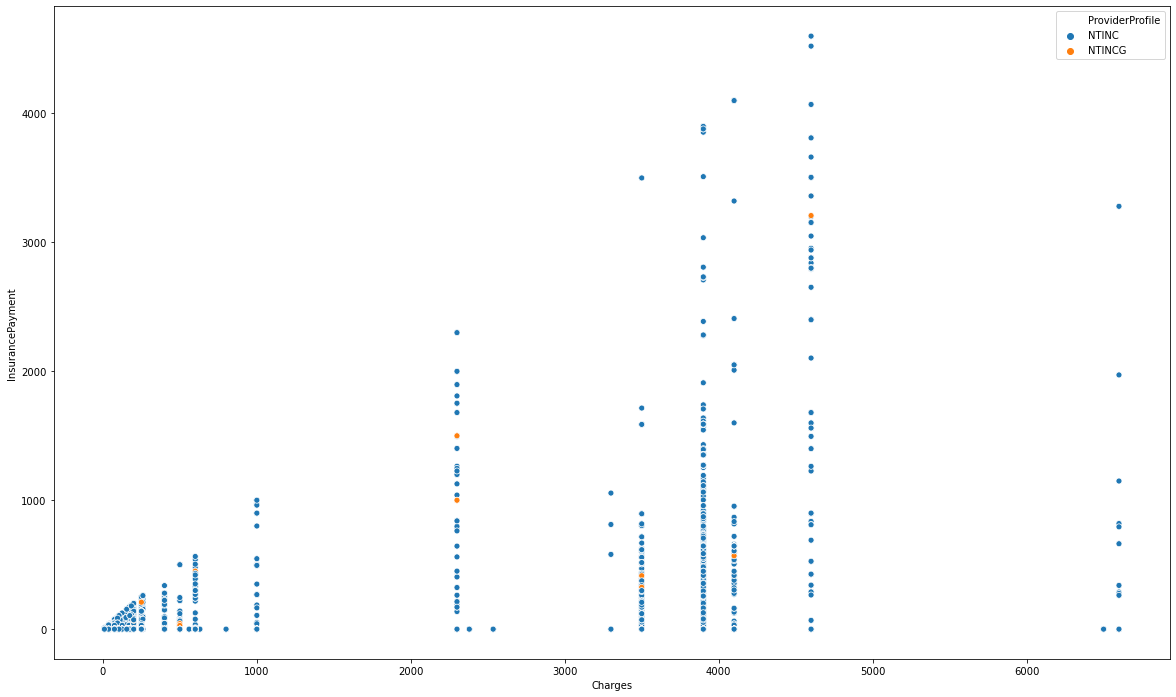

In [19]:
#accepted=df['accepted']
plt.figure(figsize=(20,12))
sns.scatterplot(x=charges, y=insurancePayment, hue = providerProfile,data=df)

In [20]:
df.describe(include=['object'])

,TicketNumber,CarrierCode,FinancialClass,CPT,NPI,OrderingClinic,DeniedCode,ProviderProfile,accepted
count,22562,22562,22562,22562,22562,22562,22562,22562,22562
unique,22562,392,8,39,2860,1721,80,2,2
top,263979,AETLIF-E,CT - CONTRACTED,81420,1669532347,MOORE OB/GYN,-,NTINC,False
freq,1,2511,12375,5019,310,310,8901,22223,13661


In [21]:
df.to_csv("C:/Users/Laval/Downloads/MSCatUOM/data-science/project/data/Natera_last_week_process_data.csv")

In [22]:
df.shape

(22562, 25)

In [23]:
df.isnull().sum()

TicketNumber                0
DateOfService               0
CarrierCode                 0
Charges                     0
Payments                    0
InsurancePayment            0
PatientPayment              0
Writeoffs                   0
FinancialClass              0
CPT                         0
DateofEntry                 0
PaymentPostDate             0
NPI                         0
OrderingClinic              0
DeniedCode                  0
FirstBilledDate             0
ProviderProfile             0
InsuranceBal                0
PatientBal                  0
AllowedAmount               0
CaseCount                   0
accepted                    0
timedelta                   0
InsurancePatientPayment     0
InsurancePaymentWritoffs    0
dtype: int64

In [24]:
charges = df['Charges']

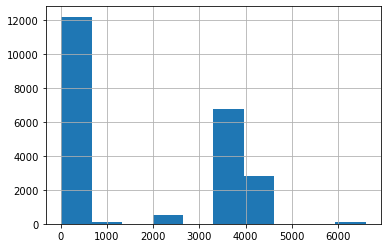

In [25]:
charges.hist()

In [26]:
charges.describe()

count    22562.000000
mean      1883.571669
std       1860.330346
min         10.000000
25%        185.000000
50%        500.000000
75%       3900.000000
max       6600.000000
Name: Charges, dtype: float64

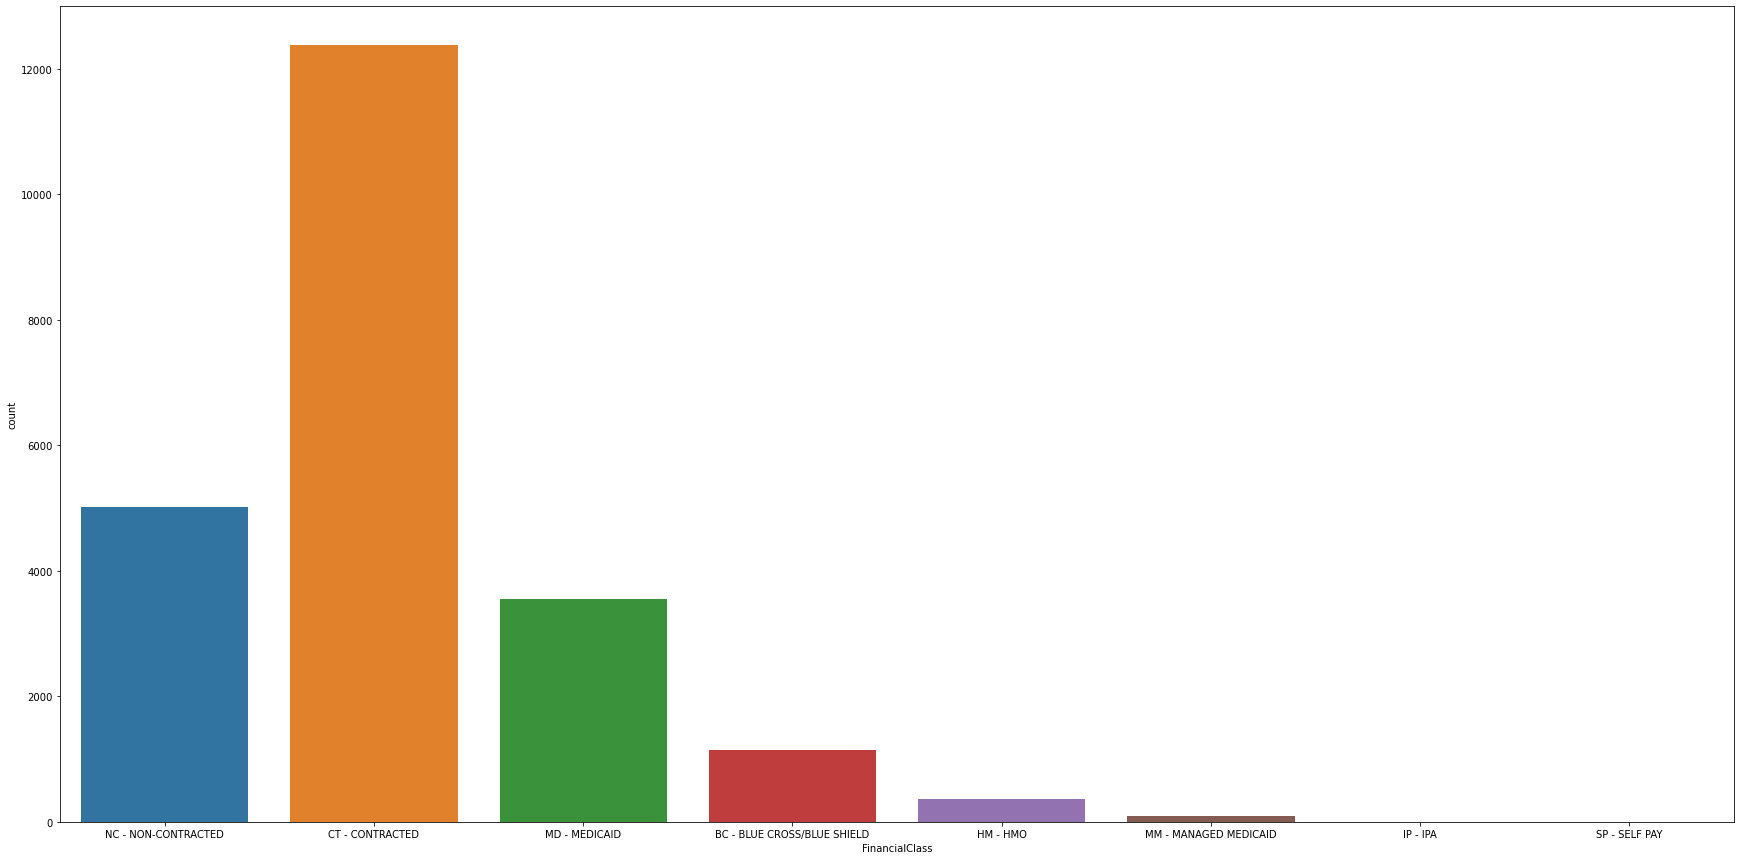

In [27]:
plt.figure(figsize=(30,15))
sns.countplot(df['FinancialClass'])

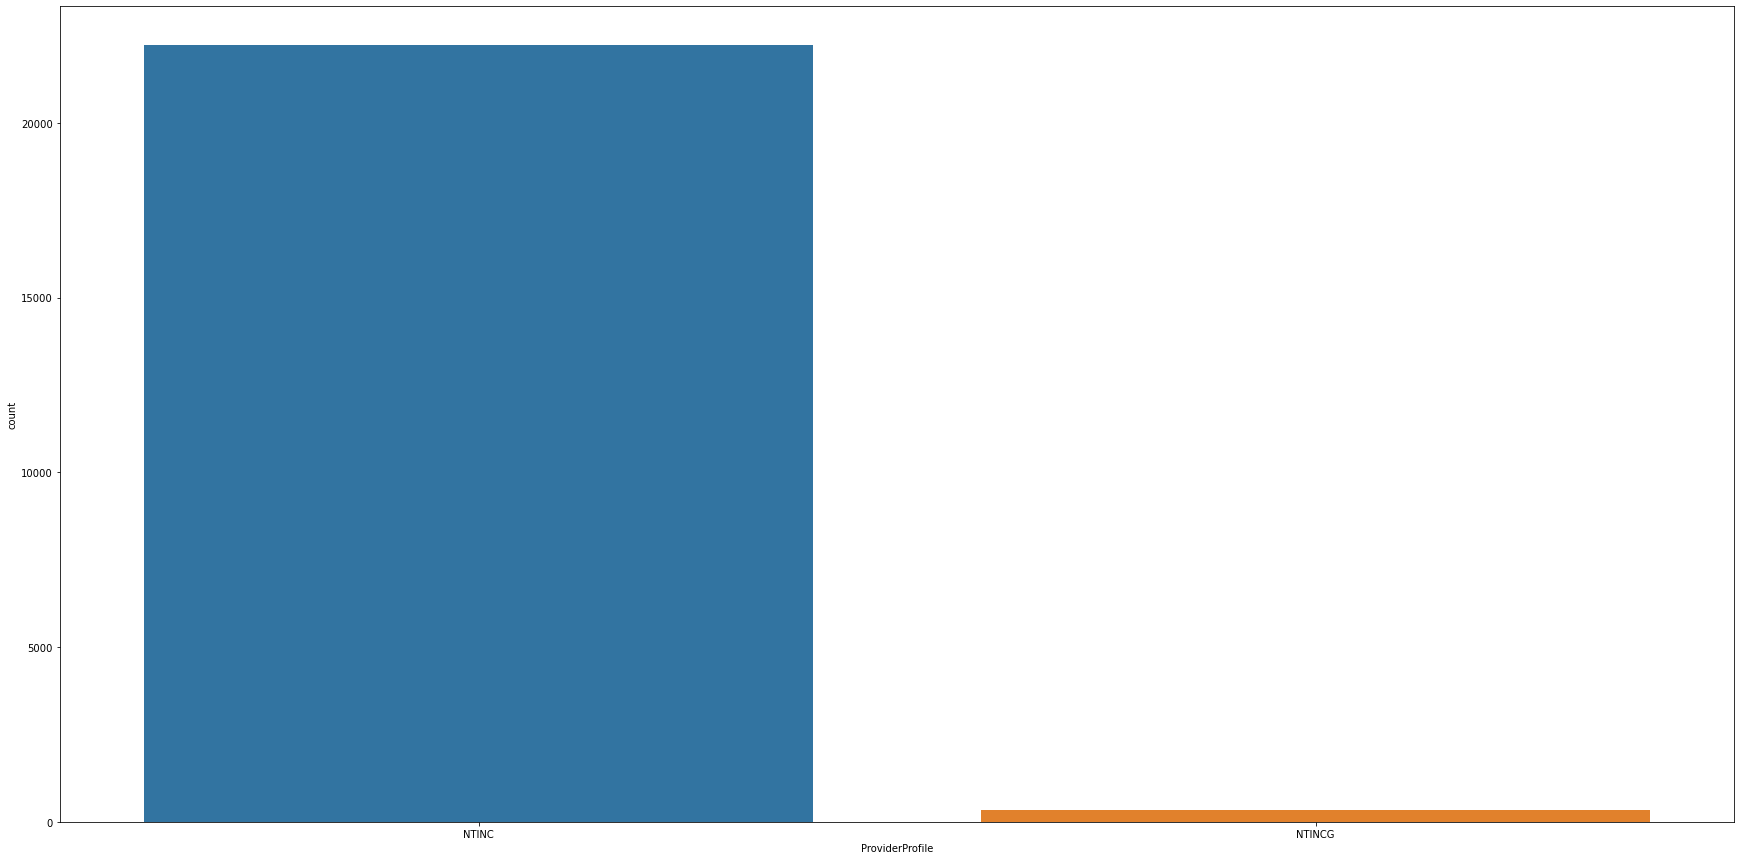

In [28]:
plt.figure(figsize=(30,15))
sns.countplot(df['ProviderProfile'])

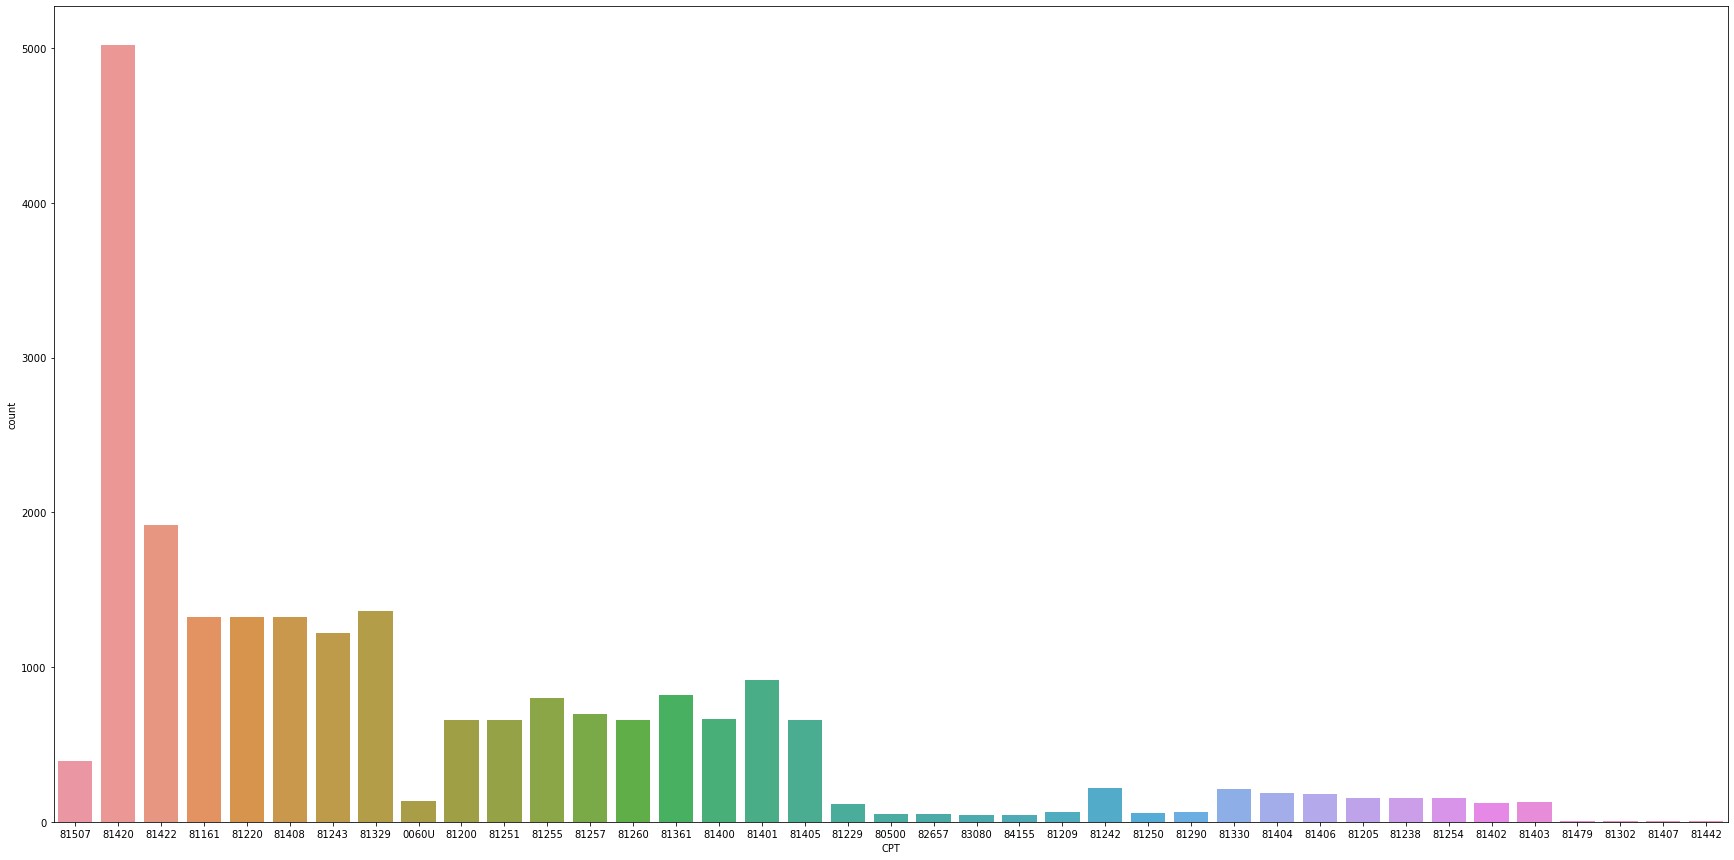

In [29]:
plt.figure(figsize=(30,15))
sns.countplot(df['CPT'])

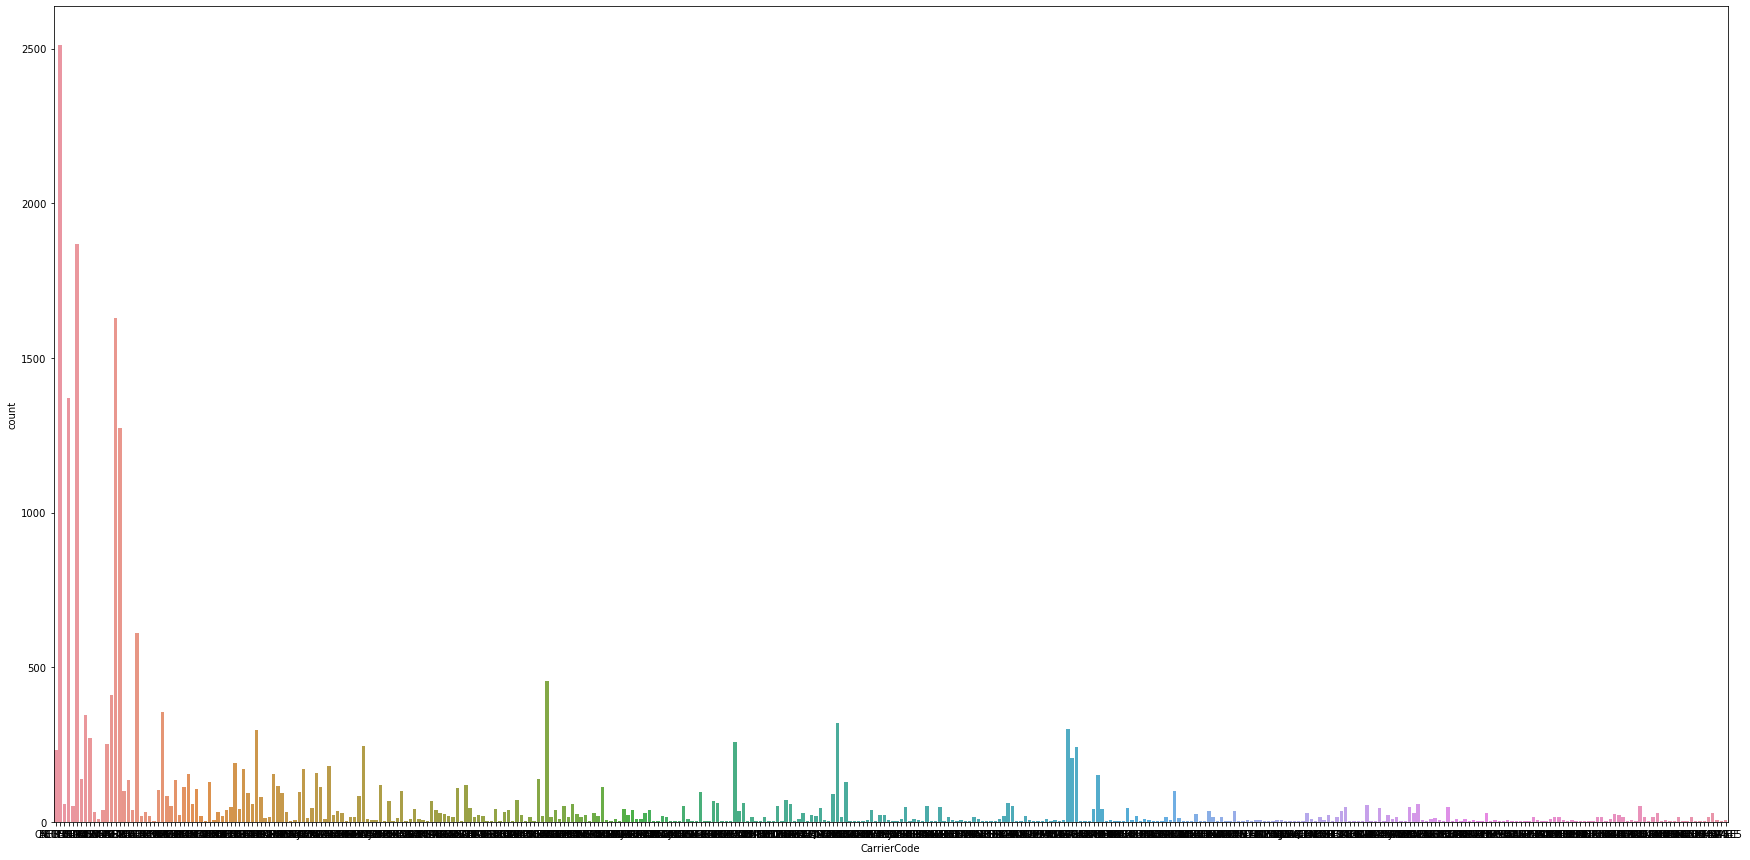

In [30]:
plt.figure(figsize=(30,15))
sns.countplot(df['CarrierCode'])

In [31]:
df = df.drop(['CaseCount', 'TicketNumber'], axis=1)

In [32]:
df.head()

,DateOfService,CarrierCode,Charges,Payments,InsurancePayment,PatientPayment,Writeoffs,FinancialClass,CPT,DateofEntry,...,DeniedCode,FirstBilledDate,ProviderProfile,InsuranceBal,PatientBal,AllowedAmount,accepted,timedelta,InsurancePatientPayment,InsurancePaymentWritoffs
0,2019-01-02,CFHP-E2,3900.0,0.0,0.0,0.0,0.0,NC - NON-CONTRACTED,81507,2019-01-07,...,197,2019-01-08,NTINC,0.0,3900.0,0.0,False,6,0.0,3900.0
1,2019-01-02,CFHP-E2,3900.0,0.0,0.0,0.0,0.0,NC - NON-CONTRACTED,81507,2019-01-07,...,197,2019-01-08,NTINC,0.0,3900.0,0.0,False,6,0.0,3900.0
3,2019-01-02,AETLIF-E,3900.0,0.0,0.0,0.0,0.0,CT - CONTRACTED,81420,2019-01-07,...,-,2019-01-08,NTINC,3900.0,0.0,749.0,True,6,0.0,3900.0
4,2019-01-02,AETLIF-E,3900.0,0.0,0.0,0.0,0.0,CT - CONTRACTED,81420,2019-01-07,...,-,2019-01-08,NTINC,3900.0,0.0,749.0,True,6,0.0,3900.0
5,2019-01-02,AETLIF-E,4100.0,0.0,0.0,0.0,0.0,CT - CONTRACTED,81422,2019-01-07,...,96,2019-01-08,NTINC,0.0,4100.0,749.0,False,6,0.0,4100.0


In [33]:
accepted=df['accepted']
providerpro=df['ProviderProfile']

In [34]:
charges.head()

0    3900.0
1    3900.0
3    3900.0
4    3900.0
5    4100.0
Name: Charges, dtype: float64

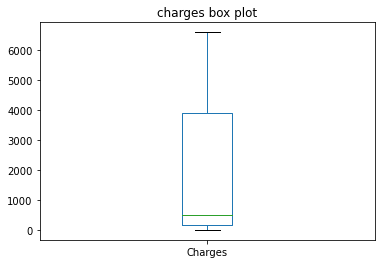

In [35]:
charges.plot(kind='box', title='charges box plot')

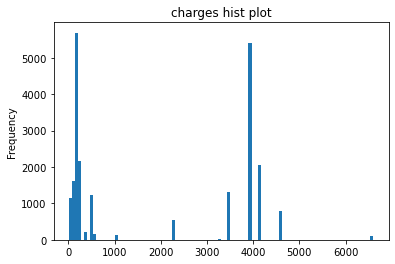

In [36]:
charges.plot(kind='hist', bins=100, title='charges hist plot')

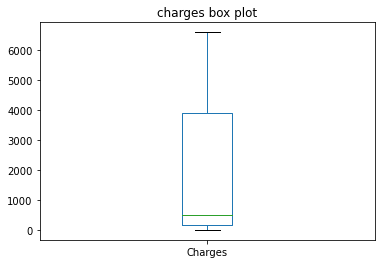

In [37]:
charges.plot(kind='box', title='charges box plot')

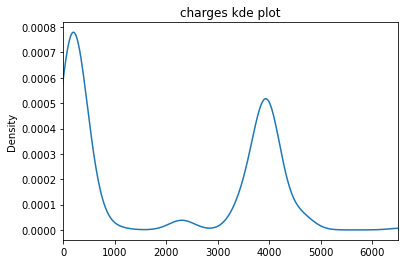

In [38]:
charges.plot(kind='kde', title='charges kde plot',xlim=(0, 6500))

In [39]:
df.head(1)

,DateOfService,CarrierCode,Charges,Payments,InsurancePayment,PatientPayment,Writeoffs,FinancialClass,CPT,DateofEntry,...,DeniedCode,FirstBilledDate,ProviderProfile,InsuranceBal,PatientBal,AllowedAmount,accepted,timedelta,InsurancePatientPayment,InsurancePaymentWritoffs
0,2019-01-02,CFHP-E2,3900.0,0.0,0.0,0.0,0.0,NC - NON-CONTRACTED,81507,2019-01-07,...,197,2019-01-08,NTINC,0.0,3900.0,0.0,False,6,0.0,3900.0


In [71]:
payments=df['Payments']
patientBal=df['PatientBal']
insuranceBal=df['InsuranceBal']
insurancePayment=df['InsurancePayment']
patientPayment=df['PatientPayment']

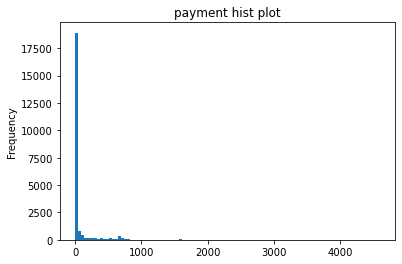

In [41]:
payments.plot(kind='hist', bins=100, title='payment hist plot')

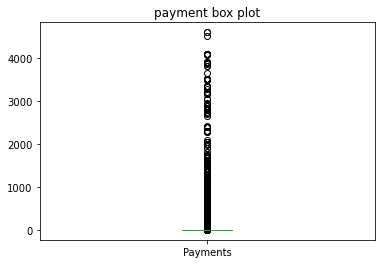

In [42]:
payments.plot(kind='box', title='payment box plot')

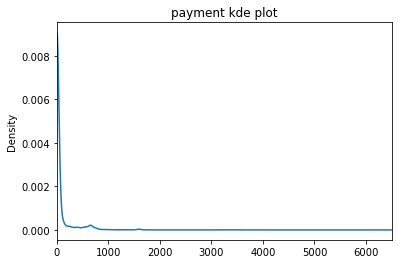

In [48]:
payments.plot(kind='kde', title='payment kde plot',xlim=(0, 6500))


In [50]:
timedelta=df['timedelta']

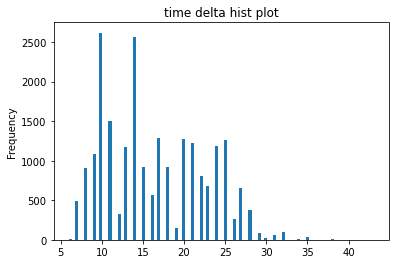

In [51]:
timedelta.plot(kind='hist', bins=100, title='time delta hist plot')

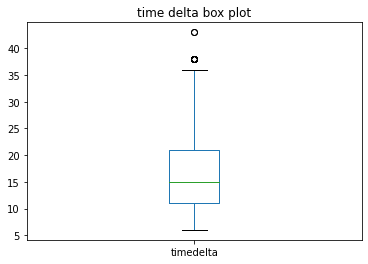

In [55]:
timedelta.plot(kind='box', title='time delta box plot')

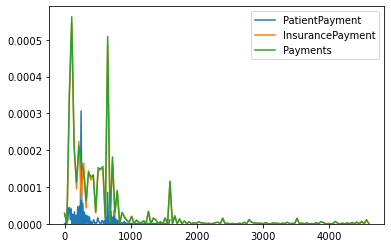

In [80]:
p=sns.kdeplot(patientPayment, shade=False)
p=sns.kdeplot(insurancePayment, shade=False)
p=sns.kdeplot(payments, shade=False)

In [ ]:
payments=df['Payments']
patientBal=df['PatientBal']
insuranceBal=df['InsuranceBal']
insurancePayment=df['InsurancePayment']
patientPayment=df['PatientPayment']

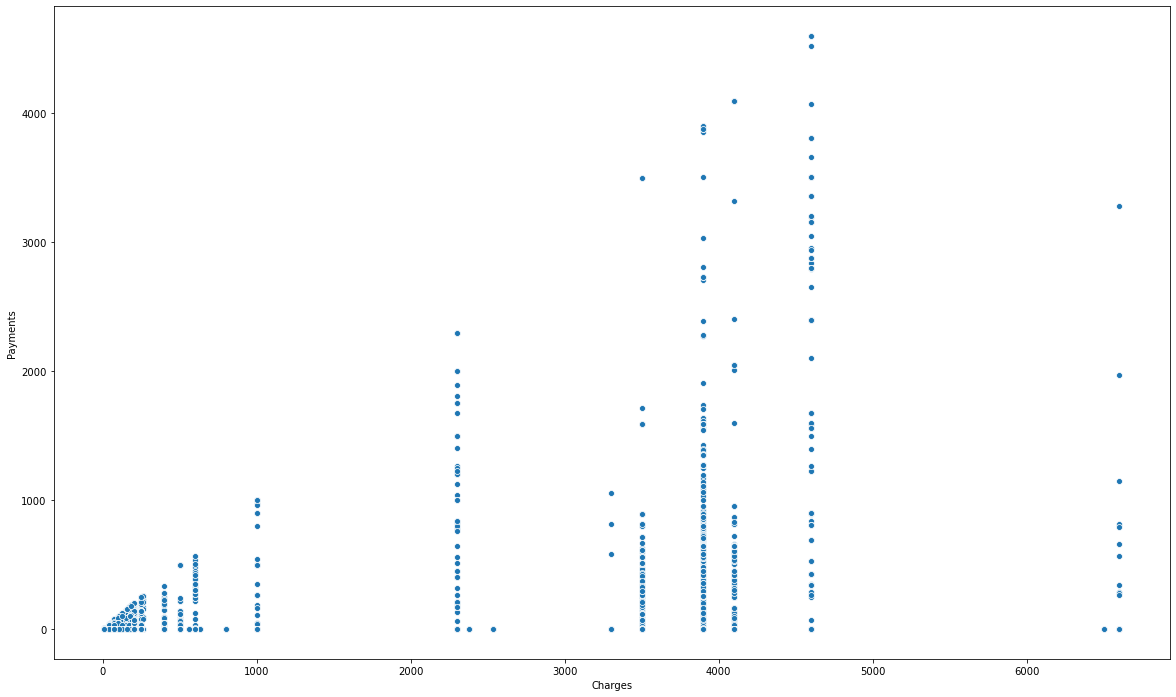

In [44]:
plt.figure(figsize=(20,12))
sns.scatterplot(x=charges, y=payments,data=df)

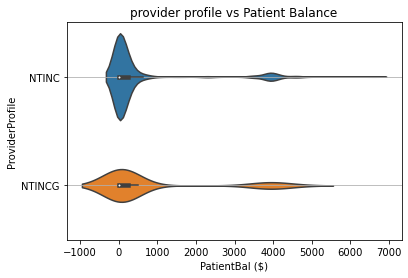

In [45]:
fontsize = 10

fig, axes = plt.subplots()
# plot violin. 'Scenario' is according to x axis, 
# 'LMP' is y axis, data is your dataframe. ax - is axes instance
sns.violinplot('PatientBal','ProviderProfile', data=df, ax = axes)
axes.set_title('provider profile vs Patient Balance')

axes.yaxis.grid(True)
axes.set_xlabel('PatientBal ($)')
axes.set_ylabel('ProviderProfile')

plt.show()

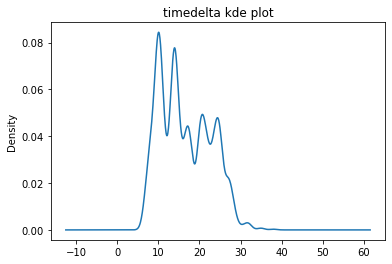

In [81]:
timedelta=df['timedelta']
timedelta.plot(kind='kde', title='timedelta kde plot')

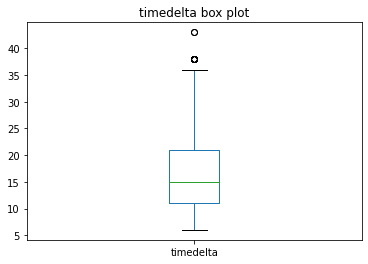

In [82]:
timedelta.plot(kind='box', title='timedelta box plot')

In [83]:
payments=df['Payments']

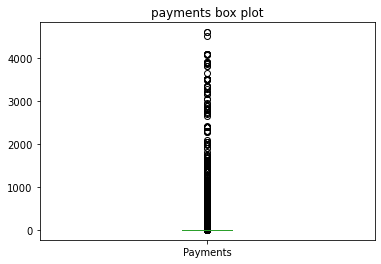

In [84]:
payments.plot(kind='box', title='payments box plot')

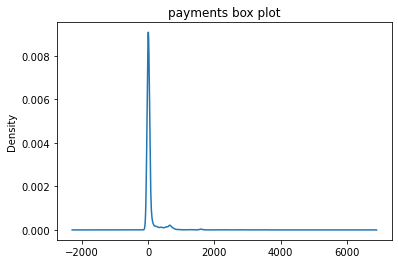

In [85]:
payments.plot(kind='kde', title='payments box plot')

In [86]:
financialClass=df['FinancialClass']

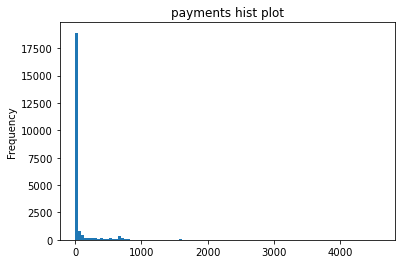

In [87]:
payments.plot(kind='hist',bins=100, title='payments hist plot', alpha=1)

In [90]:
df_cor= df.corr()
df_cor

,Charges,Payments,InsurancePayment,PatientPayment,Writeoffs,InsuranceBal,PatientBal,AllowedAmount,timedelta,InsurancePatientPayment,InsurancePaymentWritoffs
Charges,1.000000,0.232731,0.223899,0.074085,0.603203,0.337557,0.410765,-0.126466,-0.389765,0.232731,0.997831
Payments,0.232731,1.000000,0.989930,0.122863,0.256770,-0.088233,-0.088825,0.311137,-0.069561,1.000000,0.236976
InsurancePayment,0.223899,0.989930,1.000000,-0.018861,0.243643,-0.086102,-0.085308,0.310814,-0.060948,0.989930,0.231552
PatientPayment,0.074085,0.122863,-0.018861,1.000000,0.105447,-0.019551,-0.029297,0.018526,-0.064017,0.122863,0.050417
Writeoffs,0.603203,0.256770,0.243643,0.105447,1.000000,-0.202154,-0.175542,-0.013658,-0.333575,0.256770,0.597295
InsuranceBal,0.337557,-0.088233,-0.086102,-0.019551,-0.202154,1.000000,-0.152272,-0.123342,-0.037118,-0.088233,0.340097
PatientBal,0.410765,-0.088825,-0.085308,-0.029297,-0.175542,-0.152272,1.000000,-0.129485,-0.132354,-0.088825,0.417138
AllowedAmount,-0.126466,0.311137,0.310814,0.018526,-0.013658,-0.123342,-0.129485,1.000000,0.084796,0.311137,-0.127718
timedelta,-0.389765,-0.069561,-0.060948,-0.064017,-0.333575,-0.037118,-0.132354,0.084796,1.000000,-0.069561,-0.387528
InsurancePatientPayment,0.232731,1.000000,0.989930,0.122863,0.256770,-0.088233,-0.088825,0.311137,-0.069561,1.000000,0.236976


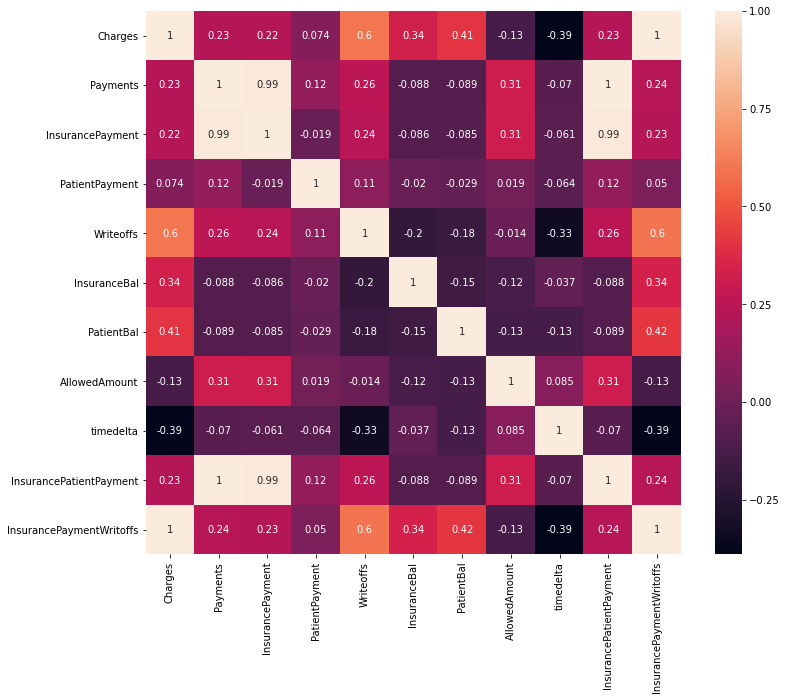

In [91]:
plt.figure(figsize=(12,10))
sns.heatmap(df_cor,annot=True)

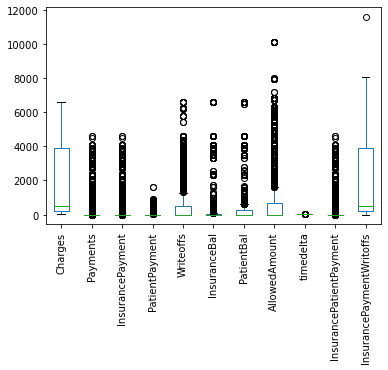

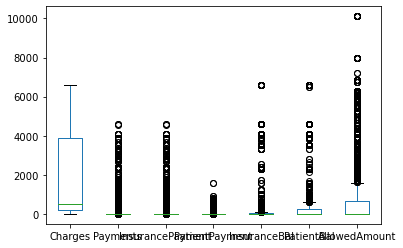

In [92]:
boxplot = df.boxplot(grid=False, rot=90, fontsize=10)
plot_val= ['Charges','Payments', 'InsurancePayment', 'PatientPayment', 'InsuranceBal', 'PatientBal','AllowedAmount']
df[plot_val].plot(kind='box')

C:\Users\Laval\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.
C:\Users\Laval\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Laval\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Laval\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3

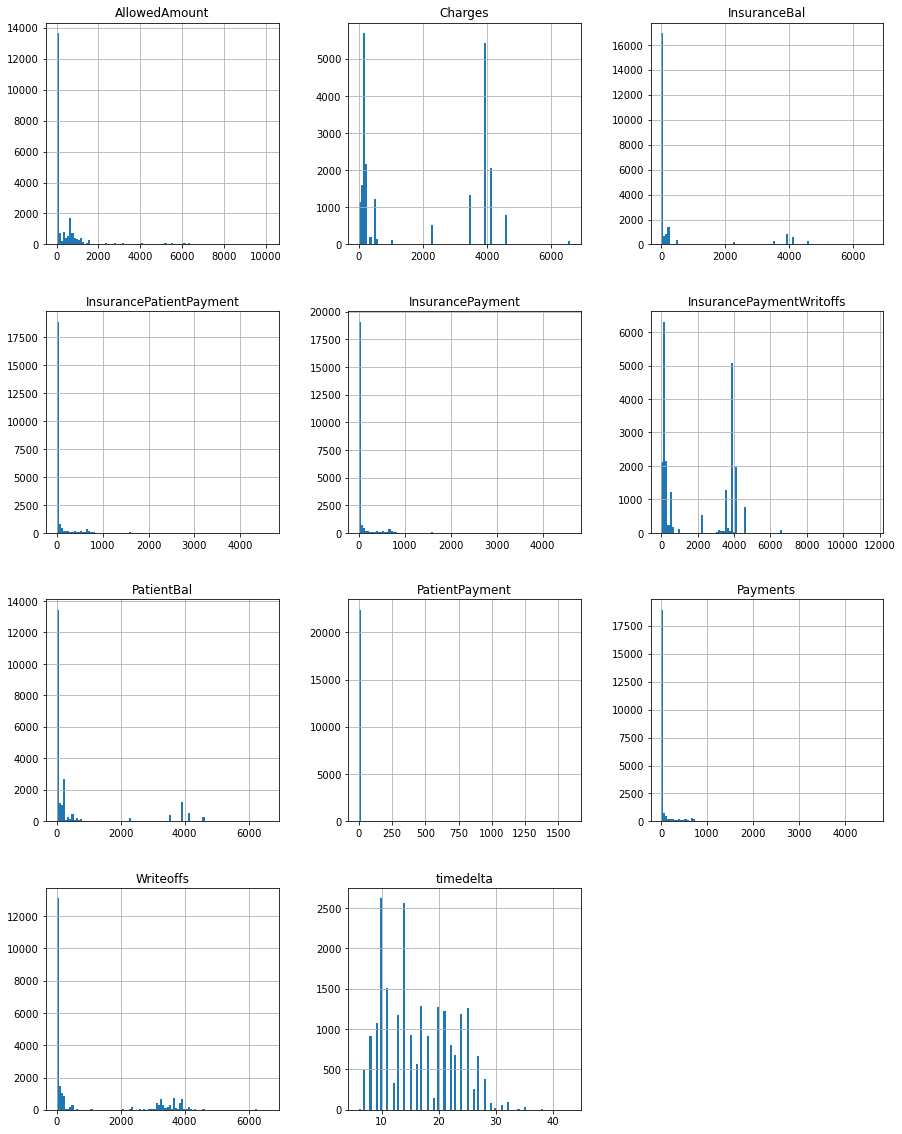

In [95]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
   
histplot = df.hist(ax = ax, bins=100,alpha=1)